<h3 align = "center">Importing Libraries</h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3 align = "center">Importing Dataset</h3>

In [2]:
data = pd.read_csv("/content/spam.csv", encoding = "ISO-8859-1")

<h3 align = "center">Preliminary Data Checks</h3>

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data.shape

(5572, 5)

In [6]:
data['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


<h3 align = "center">Putting the Length of Characters of each row in a column.</h3>

In [8]:
data["Unnamed: 2"] = data["v2"].str.len()

<h3 align = "center">Visualising Length of Characters for each category!</h3>

<Figure size 864x576 with 0 Axes>

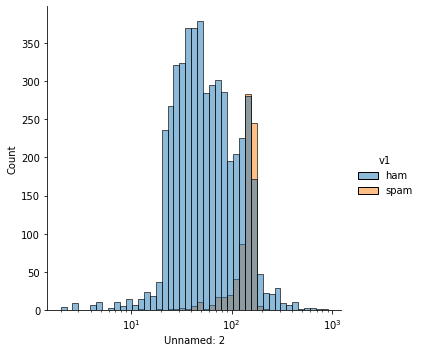

In [9]:
plt.figure(figsize = (12,8))
sns.displot(data = data ,x = "Unnamed: 2", hue = "v1",log_scale = True)

<h5>It is evident from the above plot that spam texts are usually longer in length!</h5>

<h3 align = "center">Defining Variables</h3>

In [10]:
X = data["v2"]
y = data["v1"]

<h3 align = "center">Train Test Split</h3>

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<h3 align = "center">Vecrorizing Words into Matrix</h3>

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [13]:
X_train_counts = count_vect.fit_transform(X_train)

In [14]:
X_train_counts

<3733x7057 sparse matrix of type '<class 'numpy.int64'>'
	with 49296 stored elements in Compressed Sparse Row format>

In [15]:
X_train.shape

(3733,)

In [16]:
X_train_counts.shape

(3733, 7057)

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

In [18]:
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [19]:
X_train_tfidf.shape

(3733, 7057)

<h3 align = "center">Using TDIF Vectorizer for optimum vectorization!</h3>

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [21]:
X_train_tfidf = vectorizer.fit_transform(X_train)

In [22]:
X_train_tfidf.shape

(3733, 7057)

<h3 align = "center">Creating Model</h3>

In [23]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

In [24]:
clf.fit(X_train_tfidf,y_train)

LinearSVC()

<h3 align = "center">Creating Pipeline</h3>

In [25]:
from sklearn.pipeline import Pipeline 

In [26]:
text_clf = Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])

In [27]:
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [28]:
predictions = text_clf.predict(X_test)

In [29]:
X_test

3245    Funny fact Nobody teaches volcanoes 2 erupt, t...
944     I sent my scores to sophas and i had to do sec...
1044    We know someone who you know that fancies you....
2484    Only if you promise your getting out as SOON a...
812     Congratulations ur awarded either å£500 of CD ...
                              ...                        
4944    Anyway I don't think I can secure anything up ...
3313    Oh gei. That happend to me in tron. Maybe ill ...
3652    It has issues right now. Ill fix for her by to...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
4758    Thanks 4 your continued support Your question ...
Name: v2, Length: 1839, dtype: object

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
print(confusion_matrix(y_test,predictions))

[[1581    6]
 [  27  225]]


In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1587
        spam       0.97      0.89      0.93       252

    accuracy                           0.98      1839
   macro avg       0.98      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839



<h3 align = "center">Accuracy Score</h3>

In [33]:
print(accuracy_score(y_test,predictions))

0.9820554649265906


<h3 align = "center">Predictions </h3>

In [34]:
text_clf.predict(["Hi how are you doing today?"])

array(['ham'], dtype=object)

In [35]:
text_clf.predict(["Congratulations! You are selected for a free vouchar worth $500"])

array(['spam'], dtype=object)

<h3 align = "center">Creating User Interface!</h3>

In [36]:
! pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
import gradio as gr

In [59]:
def first_nlp_spam_detector(text):
  list = []
  list.append(text)
  arr =  text_clf.predict(list)
  if arr[0] == 'ham':
    return "Your Text is a Legitimate One!"
  else:
    return "Beware of such text messages, It\'s a Spam! "

In [61]:
interface = gr.Interface(first_nlp_spam_detector,inputs = gr.Textbox(lines=2, placeholder="Enter your Text Here.....!", show_label = False),
                         outputs = gr.Label(value = "Predicting the Text Classification..!"),description = "Predicting Text Legitimacy!")

In [60]:
first_nlp_spam_detector("Congratulations! You are selected for a free vouchar worth $500")

"Beware of such text messages, It's a Spam! "

In [62]:
interface.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://15304.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f1e29db8fd0>,
 'http://127.0.0.1:7861/',
 'https://15304.gradio.app')